In [59]:
import spotipy
import pandas as pd
import numpy as np
import json
import os
import random
from plotly import express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d as m3d
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import load_dotenv
from IPython.display import IFrame
#import config


In [3]:
os.getcwd()

'c:\\Users\\romai\\Documents\\Source\\DAFT_0410\\module_2\\Project_Week_6'

In [5]:
#load_dotenv('.env')
load_dotenv('.env')
c_id = os.environ['USER_ID']
c_se = os.environ['USER_Q']


In [6]:


sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=c_id, client_secret=c_se))

## Start

In [7]:
genres = ['A Cappella','Acid House','Acid Jazz','Acid Techno','Acoustic Blues','Acoustic Pop','African Percussion','Afrobeat','Alternative Country','Albuquerque Indie','Alternative Americana','Alternative Country','Alternative Dance','Alternative Emo','Alternative Hardcore','Alternative Hip Hop','Alternative Metal','Alternative Metalcore','Alternative New Age','Alternative Pop','Alternative Pop Rock','Alternative R&b','Alternative Rock']
genres = genres + ['Baroque','Bebop','Black Metal','Blues','Blues-rock','Bossa Nova','Brazilian Gospel','Breakbeat','Britpop']
genres = genres + ['Cabaret','Cajun','Calypso','Candy Pop','Capoeira','Cello','Celtic','Celtic Rock','Chanson','Chill Groove','Chill Lounge','Choral','Christmas']
genres = genres + ['Classic Afrobeat','Classic Belgian Pop','Classic Chinese Pop','Classic Colombian Pop','Classic Czech Pop','Classic Danish Pop','Classic Dutch Pop','Classic Eurovision','Classic Finnish Pop','Classic Finnish Rock','Classic French Pop','Classic Funk Rock','Classic Garage Rock','Classic Italian Pop','Classic Norwegian Pop','Classic Peruvian Pop','Classic Polish Pop','Classic Psychedelic Rock','Classic Rock','Classic Russian Pop','Classic Russian Rock','Classic Schlager','Classic Soundtrack','Classic Swedish Pop','Classic Turkish Pop','Classic Venezuelan Pop','Classical','Classical Christmas','Classical Flute','Classical Guitar','Classical Organ','Classical Performance','Classical Period','Classical Piano']
genres = genres + ['Comedy','Concert Piano','Country Blues','Country Christmas','Country Dawn','Country Gospel','Country Road','Country Rock']
genres = genres + ['Dance Pop','Dance Rock','Dance-punk','Digital Hardcore','Dirty South Rap','Dirty Texas Rap','Disco','Dubstep']
genres = genres + ['Electric Blues','Electro','Electro Dub','Electro House','Electro Jazz','Electro Latino','Electro Swing','Electro Trash','Electro-industrial','Eurovision']
genres = genres + ['Experimental','Experimental Dubstep','Experimental Psych','Experimental Rock']
genres = genres + ['Flamenco','Folk','Folk Christmas','Folk Metal','Folk Punk','Folk Rock','Folk-pop','Folk-prog','Folklore Argentino','Folkmusik','Free Jazz','Freestyle','French Folk','French Folk Pop','French Hip Hop','French Indie Pop','French Movie Tunes','French Pop','French Punk','French Reggae','French Rock']
genres = genres + ['Funk','Funk Carioca','Funk Metal','Funk Rock','Gangster Rap','Garage Pop','Garage Punk','Garage Punk Blues','Garage Rock','Gangster Rap','Garage Pop','Garage Punk','Garage Punk Blues','Garage Rock']
genres = genres + ['Groove Metal','Grunge','Grunge Pop','Gypsy Jazz','Hard Alternative','Hard Bop','Hard Glam','Hard House','Hard Rock','Hard Stoner Rock','Hard Trance','Hardcore','Hardcore Breaks','Hardcore Hip Hop','Hardcore Punk','Hardcore Techno']
genres = genres + ['Harmonica Blues','Heavy Alternative','Hip Hop','Hip Pop','Indie Dream Pop','Indie Emo','Indie Emo Rock','Indie Folk','Indie Fuzzpop','Indie Pop','Indie Pop Rock','Indie Post-punk','Indie Psych-pop','Indie R&b','Indie Rock','Indie Shoegaze','Indie Singer-songwriter']
genres = genres + ['Indorock','Industrial','Industrial Metal','Industrial Rock','Instrumental Post Rock','Jazz','Jazz Bass','Jazz Blues','Jazz Brass','Jazz Christmas','Jazz Funk','Jazz Fusion','Jazz Metal','Jazz Orchestra','Jazz Trio']
genres = genres + ['K-hop','Latin','Latin Alternative','Latin Christian','Latin Christmas','Latin Electronica','Latin Hip Hop','Latin Jazz','Latin Metal','Latin Pop']
genres = genres + ['Lounge','Lounge House','Mambo','Mariachi','Mashup','Medieval','Metal','Military Band','Minimal','Minimal Dub','Minimal Dubstep','Minimal Melodic Techno','Minimal Tech House','Minimal Techno','Minimal Wave']
genres = genres + ['Modern Blues','Modern Classical','Modern Country Rock','Modern Downshift','Modern Free Jazz','Modern Performance','Modern Southern Rock','Motown','Musique Pour Enfants']
genres = genres + ['Neo Classical Metal','Neo Honky Tonk','Neo Mellow','Neo Metal','Neo Soul','Neo Soul-jazz','Neo-industrial Rock','Neo-pagan','Neo-progressive','Neo-psychedelic','Neo-rockabilly','Neo-singer-songwriter','Neo-synthpop','Neo-trad Metal','Neo-traditional Country','Neoclassical','Neofolk']
genres = genres + ['New Age','New Beat','New Wave','Old School Hip Hop','Opera','Orchestral','Piano Rock','Pop','Pop Christmas','Pop Emo','Pop House','Pop Punk','Pop Rap','Pop Rock']
genres = genres + ['Progressive Alternative','Progressive Bluegrass','Progressive Electro House','Progressive House','Progressive Metal','Progressive Psytrance','Progressive Rock','Progressive Trance','Progressive Trance House','Progressive Uplifting Trance']
genres = genres + ['Psychedelic Blues-rock','Psychedelic Rock','Psychedelic Trance','Punk','Punk Blues','Punk Christmas','Punk Ska','R&b','Ragga Jungle','Rap','Rap Metal','Rap Metalcore','Rap Rock','Raw Black Metal']
genres = genres + ['Reggae','Reggae Fusion','Reggae Rock','Reggaeton','Rock','Rock Catala','Rock En Espanol','Rock Gaucho','Rock Noise','Rock Steady','Rock-and-roll','Rockabilly']
genres = genres + ['Rumba','Salsa','Samba','Ska','Ska Punk','Ska Revival','Smooth Jazz','Soul','Soul Blues','Soul Christmas','Soul Flow','Soul Jazz','Soundtrack']
genres = genres + ['Space Rock','Surf Music','Swamp Blues','Swamp Pop','Tango','Tech House','Techno','Texas Blues','Traditional Blues','Traditional British Folk','Traditional Country','Traditional Folk','Traditional Funk','Traditional Irish Fol','Traditional Reggae','Traditional Rockabilly','Traditional Scottish Folk','Traditional Ska','Traditional Soul','Traditional Swing','Trance']
genres = genres + ['Trash Rock','Tribal House','Trip Hop','Violin','Zouk','Zydeco']


In [8]:
len(genres)

333

In [9]:
print(genres)

['A Cappella', 'Acid House', 'Acid Jazz', 'Acid Techno', 'Acoustic Blues', 'Acoustic Pop', 'African Percussion', 'Afrobeat', 'Alternative Country', 'Albuquerque Indie', 'Alternative Americana', 'Alternative Country', 'Alternative Dance', 'Alternative Emo', 'Alternative Hardcore', 'Alternative Hip Hop', 'Alternative Metal', 'Alternative Metalcore', 'Alternative New Age', 'Alternative Pop', 'Alternative Pop Rock', 'Alternative R&b', 'Alternative Rock', 'Baroque', 'Bebop', 'Black Metal', 'Blues', 'Blues-rock', 'Bossa Nova', 'Brazilian Gospel', 'Breakbeat', 'Britpop', 'Cabaret', 'Cajun', 'Calypso', 'Candy Pop', 'Capoeira', 'Cello', 'Celtic', 'Celtic Rock', 'Chanson', 'Chill Groove', 'Chill Lounge', 'Choral', 'Christmas', 'Classic Afrobeat', 'Classic Belgian Pop', 'Classic Chinese Pop', 'Classic Colombian Pop', 'Classic Czech Pop', 'Classic Danish Pop', 'Classic Dutch Pop', 'Classic Eurovision', 'Classic Finnish Pop', 'Classic Finnish Rock', 'Classic French Pop', 'Classic Funk Rock', 'Class

In [10]:
genres_nocap = list(map(lambda x: x.lower(), genres))  
print(genres_nocap)
genre_nocap_dict = {genre: i for i, genre in enumerate(sorted(genres_nocap, key=lambda x: x.split()[-1]))}

['a cappella', 'acid house', 'acid jazz', 'acid techno', 'acoustic blues', 'acoustic pop', 'african percussion', 'afrobeat', 'alternative country', 'albuquerque indie', 'alternative americana', 'alternative country', 'alternative dance', 'alternative emo', 'alternative hardcore', 'alternative hip hop', 'alternative metal', 'alternative metalcore', 'alternative new age', 'alternative pop', 'alternative pop rock', 'alternative r&b', 'alternative rock', 'baroque', 'bebop', 'black metal', 'blues', 'blues-rock', 'bossa nova', 'brazilian gospel', 'breakbeat', 'britpop', 'cabaret', 'cajun', 'calypso', 'candy pop', 'capoeira', 'cello', 'celtic', 'celtic rock', 'chanson', 'chill groove', 'chill lounge', 'choral', 'christmas', 'classic afrobeat', 'classic belgian pop', 'classic chinese pop', 'classic colombian pop', 'classic czech pop', 'classic danish pop', 'classic dutch pop', 'classic eurovision', 'classic finnish pop', 'classic finnish rock', 'classic french pop', 'classic funk rock', 'class

In [11]:
genre_dict = {genre: i for i, genre in enumerate(sorted(genres, key=lambda x: x.split()[-1]))}

In [12]:
genre_dict

{'Afrobeat': 0,
 'Classic Afrobeat': 1,
 'Alternative New Age': 2,
 'New Age': 3,
 'Hard Alternative': 4,
 'Heavy Alternative': 5,
 'Latin Alternative': 6,
 'Progressive Alternative': 7,
 'Alternative Americana': 8,
 'Folklore Argentino': 9,
 'Military Band': 10,
 'Baroque': 11,
 'Jazz Bass': 12,
 'New Beat': 13,
 'Bebop': 14,
 'Progressive Bluegrass': 15,
 'Acoustic Blues': 16,
 'Blues': 17,
 'Country Blues': 18,
 'Electric Blues': 19,
 'Garage Punk Blues': 21,
 'Harmonica Blues': 22,
 'Jazz Blues': 23,
 'Modern Blues': 24,
 'Punk Blues': 25,
 'Soul Blues': 26,
 'Swamp Blues': 27,
 'Texas Blues': 28,
 'Traditional Blues': 29,
 'Blues-rock': 30,
 'Psychedelic Blues-rock': 31,
 'Hard Bop': 32,
 'Jazz Brass': 33,
 'Breakbeat': 34,
 'Hardcore Breaks': 35,
 'Britpop': 36,
 'Cabaret': 37,
 'Cajun': 38,
 'Calypso': 39,
 'Capoeira': 40,
 'A Cappella': 41,
 'Funk Carioca': 42,
 'Rock Catala': 43,
 'Cello': 44,
 'Celtic': 45,
 'Chanson': 46,
 'Choral': 47,
 'Latin Christian': 48,
 'Christmas': 

# Get Traks & Features

In [13]:

start = 0
Limit=10
maxi = 49
Compteur = 0
CptGenre=0
Header=True
CptGenreTot = len(genres)
for genre in genres:
    Track_ids = []
    Tracks = []
    #Get track list
    for i in range(start,maxi,50):
        try:
            Results = sp.search(q='genre:"{}"'.format(genre), type='track',offset=i, limit=Limit)
            Tracks = Tracks + Results['tracks']['items']
        except spotipy.SpotifyException as e:
            print(e.msg)

    Track_ids = Track_ids + [Track['id'] for Track in Tracks]
    CptGenre += 1
    print(CptGenre,'|',CptGenreTot,' Len Tracks for ',genre,': ',len(Tracks))
    
    try:
        if len(Tracks) > 0:
            #Get audio_features
            list_of_audio_features=[]
            for item in range(0,len(Tracks)):
            #for item in range(0,10):
                MyDic = {}
                MyDic= '{ "item" : ' + str(Compteur) + ',"genre" : "' + genre + '" , "name" : "' + Tracks[item]['name'].replace('"','')  +  '" ,"artist" : "' + Tracks[item]['artists'][0]['name'].replace('"','') + '"}'
                #print(MyDic)
                Compteur += 1
                MyDic = json.loads(MyDic)
                try:
                    MyDic.update(sp.audio_features(Tracks[item]["id"])[0])
                    #print(MyDic)
                    list_of_audio_features.append(MyDic)
                except spotipy.SpotifyException as e:
                    print(e.msg)
            print('Get audio_features for ',genre,' : ', item + 1, ' Total : ',Compteur) 

            #save to file
            df=pd.DataFrame(list_of_audio_features)    
            df=df[["item","genre","id","name","artist","danceability","energy","key","mode","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms"]]
            #append to csv
            df.to_csv('audio_features.csv',mode='a',index=False, header=Header)
            Header = False
    except Exception as e:
        print(repr(e))

print("\n\n\nDone")



1 | 333  Len Tracks for  A Cappella :  10
Get audio_features for  A Cappella  :  10  Total :  10
2 | 333  Len Tracks for  Acid House :  10
Get audio_features for  Acid House  :  10  Total :  20
3 | 333  Len Tracks for  Acid Jazz :  10
Get audio_features for  Acid Jazz  :  10  Total :  30
4 | 333  Len Tracks for  Acid Techno :  10
Get audio_features for  Acid Techno  :  10  Total :  40
5 | 333  Len Tracks for  Acoustic Blues :  10
Get audio_features for  Acoustic Blues  :  10  Total :  50
6 | 333  Len Tracks for  Acoustic Pop :  10
Get audio_features for  Acoustic Pop  :  10  Total :  60
7 | 333  Len Tracks for  African Percussion :  10
Get audio_features for  African Percussion  :  10  Total :  70
8 | 333  Len Tracks for  Afrobeat :  10
Get audio_features for  Afrobeat  :  10  Total :  80
9 | 333  Len Tracks for  Alternative Country :  10
Get audio_features for  Alternative Country  :  10  Total :  90
10 | 333  Len Tracks for  Albuquerque Indie :  10


KeyboardInterrupt: 

## spotify_Exploit

In [43]:
df = pd.read_csv('audio_features.csv', sep=',')
print(len(df))
df = df.drop_duplicates()
print(len(df))
df.dropna(subset=["item","genre","id","name","artist","danceability","energy","key","mode","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms"], inplace=True)

154835
154835


In [44]:
df

,item,genre,id,name,artist,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0,A Cappella,4hObp5bmIJ3PP3cKA9K9GY,Don't Worry Be Happy,Bobby McFerrin,0.675,0.166,11,1,-22.602,0.1710,0.8800,0.000071,0.0461,0.747,68.837,294400
1,1,A Cappella,0HZk0QsXPhMNAWNDR3rYE8,Hallelujah,Pentatonix,0.364,0.378,7,0,-7.381,0.0331,0.4700,0.000000,0.3390,0.366,89.918,268960
2,2,A Cappella,2mgPmzcrz3sBCR7AvCr6mE,Trebles Finals: Bright Lights Bigger City/Magic,The Treblemakers,0.577,0.525,9,0,-7.196,0.2250,0.2140,0.000000,0.1030,0.410,113.055,154147
3,3,A Cappella,07o54snAilKYHsW8bGFe9x,Bellas Finals: Price Tag/Don’t You (Forget Abo...,The Barden Bellas,0.486,0.694,0,1,-5.800,0.1410,0.5740,0.000000,0.1250,0.248,109.410,216413
4,4,A Cappella,0phwM5a6TdLBDl0F9bk5fl,Riff Off: Mickey/Like A Virgin/Hit Me With You...,The Barden Bellas,0.571,0.499,11,1,-5.515,0.4040,0.5540,0.000000,0.0908,0.755,126.434,224267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154830,156152,Zydeco,3M4KKLnPHjP0vhHMCzhcgS,The Things I Did For You - Take 1,Clifton Chenier,0.831,0.358,11,0,-8.581,0.0564,0.5480,0.000058,0.0921,0.875,107.822,170200
154831,156153,Zydeco,4H8x9xfVHqjBXWrSicNysT,Drinkin' To You,Red Stick Ramblers,0.690,0.554,7,1,-6.764,0.0295,0.2850,0.000000,0.1650,0.894,76.478,183093
154832,156154,Zydeco,2oUjXQrcUFBQziLcXsaDwj,My Zydeco Shoes,Zydeco All-Stars,0.468,0.809,7,1,-8.605,0.1560,0.1880,0.000076,0.0580,0.929,199.712,149760
154833,156155,Zydeco,59TEH1mRjMe95GzBLjBt8r,If It's Good for the Gander,Rockin' Sidney,0.848,0.695,3,1,-11.851,0.0336,0.1250,0.000076,0.0624,0.973,123.325,241347


In [45]:
df['genre_n'] = df['genre'].map(genre_dict)

In [46]:
df1=df[["id","genre_n","danceability","energy","key","mode","loudness","speechiness","acousticness","instrumentalness","valence","tempo"]]

In [47]:
df[["id","genre_n","danceability","energy","key","mode","loudness","speechiness","acousticness","instrumentalness","valence","tempo"]]

,id,genre_n,danceability,energy,key,mode,loudness,speechiness,acousticness,instrumentalness,valence,tempo
0,4hObp5bmIJ3PP3cKA9K9GY,41,0.675,0.166,11,1,-22.602,0.1710,0.8800,0.000071,0.747,68.837
1,0HZk0QsXPhMNAWNDR3rYE8,41,0.364,0.378,7,0,-7.381,0.0331,0.4700,0.000000,0.366,89.918
2,2mgPmzcrz3sBCR7AvCr6mE,41,0.577,0.525,9,0,-7.196,0.2250,0.2140,0.000000,0.410,113.055
3,07o54snAilKYHsW8bGFe9x,41,0.486,0.694,0,1,-5.800,0.1410,0.5740,0.000000,0.248,109.410
4,0phwM5a6TdLBDl0F9bk5fl,41,0.571,0.499,11,1,-5.515,0.4040,0.5540,0.000000,0.755,126.434
...,...,...,...,...,...,...,...,...,...,...,...,...
154830,3M4KKLnPHjP0vhHMCzhcgS,332,0.831,0.358,11,0,-8.581,0.0564,0.5480,0.000058,0.875,107.822
154831,4H8x9xfVHqjBXWrSicNysT,332,0.690,0.554,7,1,-6.764,0.0295,0.2850,0.000000,0.894,76.478
154832,2oUjXQrcUFBQziLcXsaDwj,332,0.468,0.809,7,1,-8.605,0.1560,0.1880,0.000076,0.929,199.712
154833,59TEH1mRjMe95GzBLjBt8r,332,0.848,0.695,3,1,-11.851,0.0336,0.1250,0.000076,0.973,123.325


In [48]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(df1[["genre_n","danceability","energy","loudness","speechiness","acousticness","instrumentalness","valence","tempo"]])

In [49]:
df_normalized = pd.DataFrame(X_normalized, columns=["genre_n","danceability","energy","loudness","speechiness","acousticness","instrumentalness","valence","tempo"])

In [50]:
pca = PCA(n_components=9)

In [51]:
pca.fit(X_normalized)

PCA(n_components=9)

In [52]:
pca.explained_variance_ratio_

array([0.32779158, 0.15788255, 0.11289809, 0.10547319, 0.09794089,
       0.09121374, 0.05577317, 0.03593903, 0.01508775])

In [53]:
np.cumsum(pca.explained_variance_ratio_)

array([0.32779158, 0.48567413, 0.59857222, 0.70404542, 0.80198631,
       0.89320005, 0.94897322, 0.98491225, 1.        ])

In [54]:
X_pca = pca.transform(X_normalized)

In [57]:
kmeans = KMeans(n_clusters=50, n_init=10)

In [70]:
%%time
kmeans.fit(X_pca)

Wall time: 1min 46s


KMeans(n_clusters=50)

In [71]:
X_pca

array([[ 2.71581764,  3.21081762,  0.80690169, ...,  0.48276178,
         1.00972395, -0.4681235 ],
       [ 1.19645877,  0.15746443,  0.57570564, ...,  0.24079752,
        -0.19753909,  0.68890373],
       [-0.24285296,  0.69039173,  1.9476748 , ..., -0.25944385,
         0.21040766,  0.50983007],
       ...,
       [-1.86971255, -0.50757328,  0.30920311, ...,  0.80415721,
         0.4626095 , -0.08158203],
       [-1.32779234,  1.44578711, -1.93506689, ..., -0.10359863,
         0.86931192, -0.41979693],
       [-1.20910647,  1.22132116, -2.24616427, ...,  0.64813856,
         0.94119374, -0.12721615]])

In [72]:
cluster_ids = kmeans.predict(X_pca)

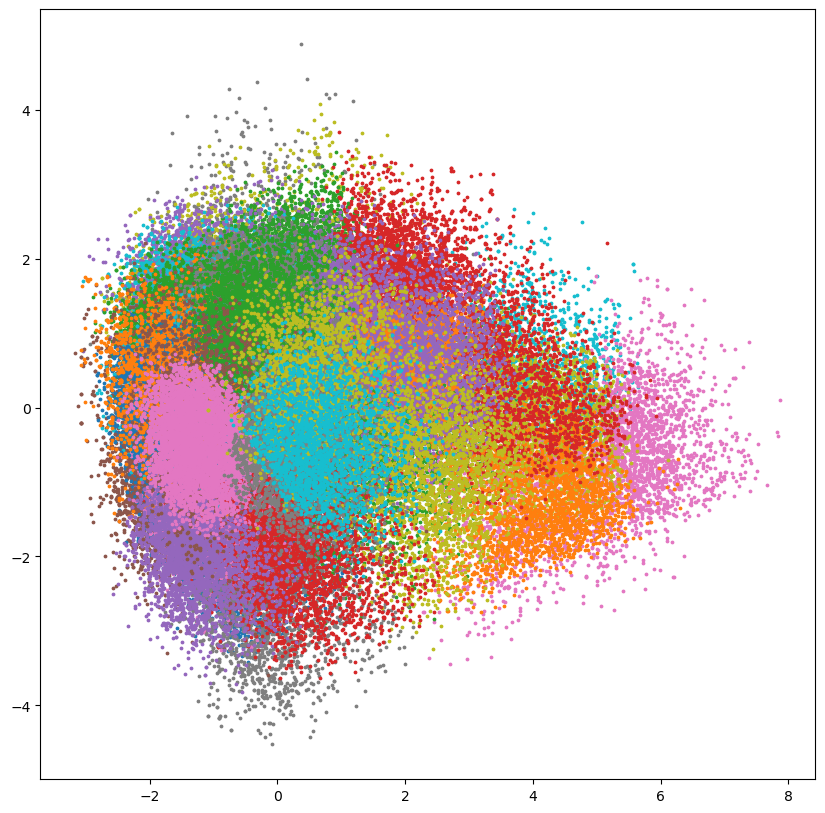

In [73]:
plt.figure(figsize=(10,10))
for c in np.unique(cluster_ids):
    plt.scatter(X_pca[cluster_ids == c, 0], X_pca[cluster_ids == c, 1], marker='.', s=12)

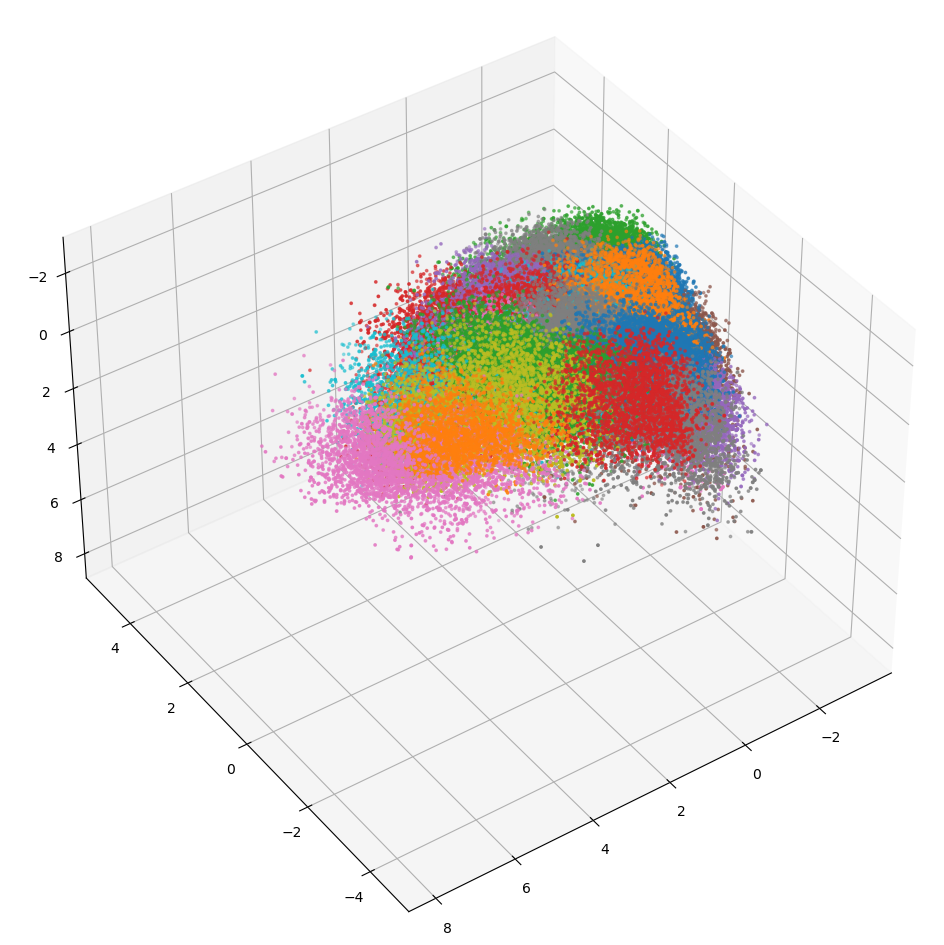

In [74]:
#m3d.figure(figsize=(10,10))
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111, projection='3d')

for c in np.unique(cluster_ids):
    sct = ax.scatter3D(X_pca[cluster_ids == c, 0], X_pca[cluster_ids == c, 1], X_pca[cluster_ids == c, 2], marker='.', s=12)

ax.view_init(-140, 125)

In [40]:
cluster_ids_fit_pred = KMeans(n_clusters=10, n_init=10).fit_predict(X_normalized)

In [ ]:
plt.figure(figsize=(10,10))
for c in np.unique(cluster_ids_fit_pred):
    plt.scatter(X_normalized[cluster_ids_fit_pred == c, 0], X_normalized[cluster_ids_fit_pred == c, 1], marker='.', s=12)

# Spotify Playlist Generator

In [75]:

df["cluster"] = cluster_ids

In [51]:
df.to_csv('audio_features_clustered_50.csv',',',index=True)

In [52]:
#Import spotipy Libraries & credentials
from spotipy.oauth2 import SpotifyClientCredentials
from dotenv import load_dotenv
import os

load_dotenv('.env')
c_id = os.environ['USER_ID']
c_se = os.environ['USER_Q']

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=c_id, client_secret=c_se))

Moonlight Sonata
Dance Monkey
Numb

In [89]:
my_song_list=["Moonlight Sonata"]
SongName = input('Enter song name')
if len(SongName)==0:
    SongName=random.choice(my_song_list)

#get from track name : track id, artist, album
try:
    results = sp.search(q='track:"{}"'.format(SongName), type='track', limit=1)

    #print(results['tracks']['items'][0]['id'])
    album = sp.album(results['tracks']['items'][0]['album']['id'])
    #print(results['tracks']['items'][0]['artists'][0]['id'])
    artist = sp.artist(results['tracks']['items'][0]['artists'][0]['id'])
    #convert genre name to numeric using the dic
    try:
        genre_id = genre_nocap_dict[artist["genres"][0]]
    except:
        genre_id = 169
    print(SongName , ':' , artist['name'] , ',' , album['name'] , '\n' , artist["genres"][0] ,' id:',genre_id )
except spotipy.SpotifyException as e:
    print(e.msg)

iframe = IFrame(src="https://open.spotify.com/embed/track/"+results['tracks']['items'][0]['id']+"?utm_source=generator",
                   width="320",
                   height="80",
                   frameborder="0",
                   allowtransparency="true",
                   allow="encrypted-media"
                  )
display(iframe)

song_audio_features = sp.audio_features(results['tracks']['items'][0]['id'])
#MonDic = { 'genre_n' : genre_id,'danceability' : song_audio_features[0]['danceability'],'energy' : song_audio_features[0]['energy'],'key' : song_audio_features[0]['key'],'mode' : song_audio_features[0]['mode'],'loudness' : song_audio_features[0]['loudness'],'speechiness' : song_audio_features[0]['speechiness'],'acousticness' : song_audio_features[0]['acousticness'],'instrumentalness' : song_audio_features[0]['instrumentalness'],'valence' : song_audio_features[0]['valence'],'tempo' : song_audio_features[0]['tempo']}
MonDic = { 'genre_n' : genre_id,'danceability' : song_audio_features[0]['danceability'],'energy' : song_audio_features[0]['energy'],'loudness' : song_audio_features[0]['loudness'],'speechiness' : song_audio_features[0]['speechiness'],'acousticness' : song_audio_features[0]['acousticness'],'instrumentalness' : song_audio_features[0]['instrumentalness'],'valence' : song_audio_features[0]['valence'],'tempo' : song_audio_features[0]['tempo']}

#print(MonDic)
song_scaled = scaler.transform(pd.DataFrame([MonDic]))
Bin = kmeans.predict(song_scaled)
#print('Cluster:',Bin)
df2=df.loc[df['cluster'] == Bin[0]].sample(n=10)

print('Playlist for',SongName)
display(df2[['genre','name','artist']])
print('cluster',Bin[0])
print(df.loc[df['cluster'] == Bin[0]].value_counts('genre').head(10))

for track_id in df2['id']:
    iframe = IFrame(src="https://open.spotify.com/embed/track/"+track_id+"?utm_source=generator",
                   width="320",
                   height="80",
                   frameborder="0",
                   allowtransparency="true",
                   allow="encrypted-media"
                  )
    display(iframe)

Moonlight Sonata : Ludwig van Beethoven , Peaceful Moments (One Hour of Relaxing Instrumentals) 
 classical  id: 58


Playlist for Moonlight Sonata


,genre,name,artist
49402,Experimental Rock,The Yabba,Battles
56986,French Indie Pop,Lost Colours,Fakear
46468,Electro Swing,Sweet Swing Thing,Paul J. Borg
112024,Neofolk,Der Brandtaucher,Rome
99758,Minimal Techno,Out The Door,Hot Since 82
1987,Acid Techno,Cubes,Modular Expansion
71148,Hard Trance,Live 4 Music - Original Edit,DJ Shog
88124,Jazz Orchestra,South 21st Shuffle - Live,Maynard Ferguson
141847,Soundtrack,MEGALOVANIA,Toby Fox
46650,Electro Trash,New Breath,Kap Bambino


cluster 11
genre
Minimal Wave              162
Minimal Techno            103
Acid Techno                97
Electro Swing              85
Minimal Melodic Techno     85
Traditional Ska            84
Garage Rock                82
Garage Pop                 80
Techno                     72
Indie Dream Pop            69
dtype: int64


In [79]:
GenreList = sp.recommendation_genre_seeds()

In [86]:
GenreList



{'genres': ['acoustic',
  'afrobeat',
  'alt-rock',
  'alternative',
  'ambient',
  'anime',
  'black-metal',
  'bluegrass',
  'blues',
  'bossanova',
  'brazil',
  'breakbeat',
  'british',
  'cantopop',
  'chicago-house',
  'children',
  'chill',
  'classical',
  'club',
  'comedy',
  'country',
  'dance',
  'dancehall',
  'death-metal',
  'deep-house',
  'detroit-techno',
  'disco',
  'disney',
  'drum-and-bass',
  'dub',
  'dubstep',
  'edm',
  'electro',
  'electronic',
  'emo',
  'folk',
  'forro',
  'french',
  'funk',
  'garage',
  'german',
  'gospel',
  'goth',
  'grindcore',
  'groove',
  'grunge',
  'guitar',
  'happy',
  'hard-rock',
  'hardcore',
  'hardstyle',
  'heavy-metal',
  'hip-hop',
  'holidays',
  'honky-tonk',
  'house',
  'idm',
  'indian',
  'indie',
  'indie-pop',
  'industrial',
  'iranian',
  'j-dance',
  'j-idol',
  'j-pop',
  'j-rock',
  'jazz',
  'k-pop',
  'kids',
  'latin',
  'latino',
  'malay',
  'mandopop',
  'metal',
  'metal-misc',
  'metalcore',
